In [1]:
import matplotlib
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
common_categories = ['category','agent_type','type','folder']
regexp_total = re.compile(r'analizo_(.)*')

In [4]:
anac_df = pd.read_csv("../data/anac.csv")
anac_df.rename(columns={'type':'category'},inplace=True)
anac_df['type'] = 'anac'
anac_df['category'] = 'anac'
anac_df['agent_type'] = 'agent'
cccc_cols= [c for c in anac_df if 'cccc' in c]
drop_cccc_dic = {k[5:]:k for k in cccc_cols}

In [6]:
rep_df_2d = pd.read_csv('../data/2d-03_10_2018.csv')
rep_df_2d = rep_df_2d[rep_df_2d['is_source']==True].copy()
rep_df_2d['category'] = 'robocup-2d'
rep_df_2d['agent_type'] = 'agent'
rep_df_2d.rename(index=str,columns=drop_cccc_dic,inplace=True)

robocup_other =  pd.read_csv("../data/robocup-other-04_10_2018.csv")
robocup_other['category'] = 'Robcup-other-leagues'
robocup_other['agent_type'] = 'Robot'

robo_sim_df = pd.concat([rep_df_2d,robocup_other],sort=False)

In [8]:
robo_sim_df = robo_sim_df.rename(index=str,columns={'new_dir':'folder'})
robo_sim_df.to_csv('../data/robo-sim-data.csv')
#robo_sim_df = robo_sim_df[[c for c in robo_sim_df.columns if regexp_total.search(c) or (c in common_categories)]].copy()

In [9]:

robo_sim_df['type'] = 'Robocup'

In [69]:
git_hub_df = pd.read_csv("../data/git-hub-10_10_2018.csv")
git_hub_df['category'] = git_hub_df['new_dir_name'].str.split("/").str[-2]
git_hub_df['type'] = 'git-hub'
agent_categories = ['chess']
git_hub_df = git_hub_df.groupby('category').filter(lambda x: x['analizo_mmloc_sum'].count()>25)

git_hub_df.loc[git_hub_df.category.isin(agent_categories), 'agent_type'] = 'agent'
git_hub_df.loc[~git_hub_df.category.isin(agent_categories), 'agent_type'] = 'non-agent'
git_hub_df.rename(index=str,columns=drop_cccc_dic,inplace=True)

In [75]:
df_chatbot = pd.read_csv("../data/chatbot-20_09_2019.csv")

In [76]:
df_chatbot['category'] = df_chatbot['new_dir_name'].str.split("/").str[-2]

In [ ]:
df_chatbot['type'] = 'git-hub'

df_chatbot['agent_type'] = 'agent'
df_chatbot.rename(index=str,columns=drop_cccc_dic,inplace=True)

In [79]:
external_df  = pd.read_csv("../data/external-04_10_2018code_analysis__summery_report.csv")
external_df.rename(columns={'type':'category'},inplace=True)
external_df['type'] = 'Industry'
external_df['agent_type'] = 'Robot'

In [80]:
df_all = pd.concat([git_hub_df,anac_df,external_df,df_chatbot],sort=False)
#df_all = df_all[[c for c in df_all.columns if  regexp_total.search(c) or c in common_categories]].copy()
df_all[4:5].columns[df_all[4:5].isna().any()].tolist()
cols = [
 'analizo__module',
 'analizo_lcom4',
 'analizo_npm',
 'analizo_dit',
 'analizo_acc',
 'analizo_cbo',
 'analizo_accm',
 'analizo_amloc',
 'analizo_sc',
 'analizo_noc',
 'analizo_rfc',
 'analizo_noa',
 'analizo_nom',
 'analizo_npa',
 'analizo_mmloc',
 'analizo_loc',
 'analizo_anpm',
 'analizo_total_eloc']

In [81]:
df_all.drop(columns=cols,inplace=True)
#df_all.dropna(inplace=True)
df_all.shape

(693, 241)

In [82]:
df_robo_all = pd.concat([robo_sim_df,df_all],sort=False,ignore_index=True)
df_robo_all.shape

(782, 275)

In [83]:
df_robo_all['category'] = df_robo_all['category'].str.title()

In [84]:
print "project before removing lower quantile : " + str(df_robo_all.shape[0])
df_robo_all =df_robo_all.loc[df_robo_all['analizo_total_loc']>1000,:]
print "project after removing lower quantile : " + str(df_robo_all.shape[0])

project before removing lower quantile : 782
project after removing lower quantile : 577


In [85]:
df_robo_all.to_csv("../data/data.csv")

In [86]:
df_robo_all.groupby(['type','category'])['analizo_accm_mean'].count()

type      category            
Industry  Autodrivers              1
          Robo-Projects            4
Robocup   Robcup-Other-Leagues    21
          Robocup-2D              64
anac      Anac                    25
git-hub   Audio                   53
          Chatbot                 35
          Chess                   29
          Education               50
          Finance                 26
          Games                   34
          Graphics                59
          Ide                     53
          Mobile                  41
          Robot-Simulation        23
          Security                59
Name: analizo_accm_mean, dtype: int64

In [51]:
# df_robo_all.groupby('category').sum()['analizo_total_modules'].plot(kind='bar')

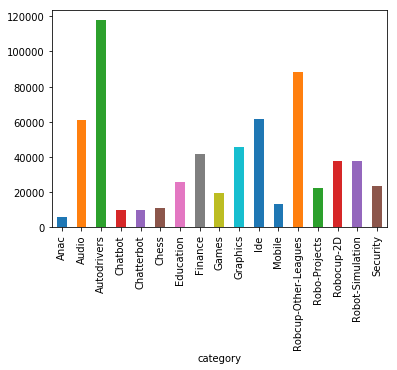

In [52]:
df_robo_all.groupby('category').mean()['analizo_total_loc'].plot(kind='bar')

In [53]:
!pip install xlwt

    100% |████████████████████████████████| 102kB 283kB/s a 0:00:01
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
df_robo_all.groupby('category').agg(['min', 'max','median'])['analizo_total_loc'].to_csv('loc.csv')

In [54]:
df_robo_all.groupby('category').sum()['analizo_total_modules']

category
Anac                      443.0
Audio                   15263.0
Autodrivers               940.0
Chatbot                  6046.0
Chatterbot               6046.0
Chess                    2260.0
Education               14039.0
Finance                 10400.0
Games                    6763.0
Graphics                23328.0
Ide                     30718.0
Mobile                   7239.0
Robcup-Other-Leagues    14763.0
Robo-Projects            1269.0
Robocup-2D              13315.0
Robot-Simulation         7820.0
Security                20702.0
Name: analizo_total_modules, dtype: float64

In [55]:
df_robo_a

NameError: name 'df_robo_a' is not defined